# Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

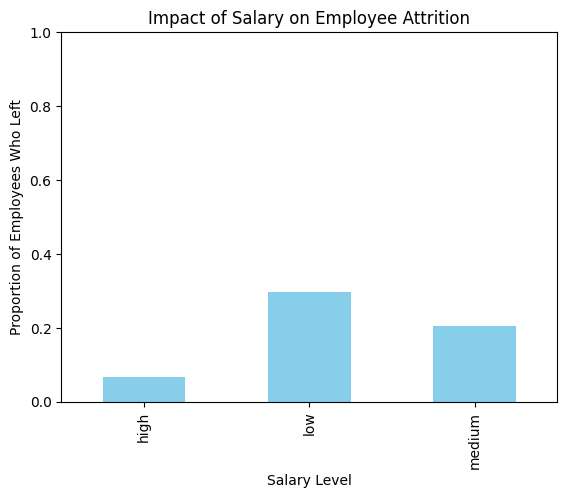

In [23]:
df.groupby('salary')['left'].mean().plot(kind='bar', color='skyblue')
plt.title('Impact of Salary on Employee Attrition')
plt.ylabel('Proportion of Employees Who Left')
plt.xlabel('Salary Level')
plt.ylim(0, 1)
plt.show()


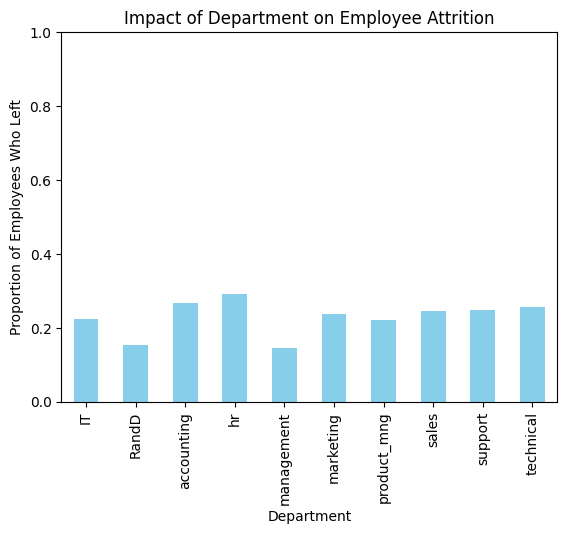

In [22]:
df.groupby('Department')['left'].mean().plot(kind='bar', color='skyblue')
plt.title('Impact of Department on Employee Attrition')
plt.ylabel('Proportion of Employees Who Left')
plt.xlabel('Department')
plt.ylim(0, 1)
plt.show()


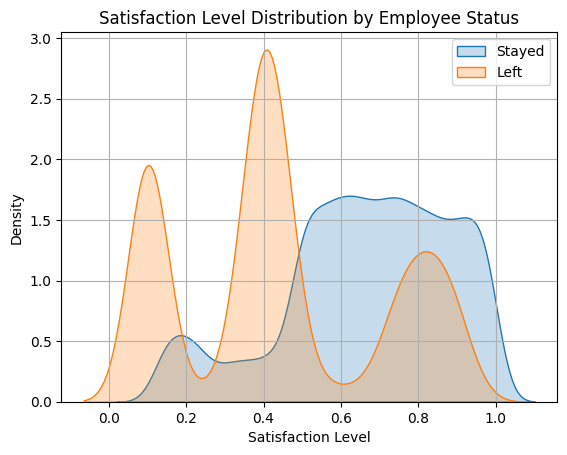

In [28]:
sns.kdeplot(data=df[df['left'] == 0]['satisfaction_level'], label='Stayed', fill=True)
sns.kdeplot(data=df[df['left'] == 1]['satisfaction_level'], label='Left', fill=True)
plt.title('Satisfaction Level Distribution by Employee Status')
plt.xlabel('Satisfaction Level')
plt.legend()
plt.grid(True)
plt.show()


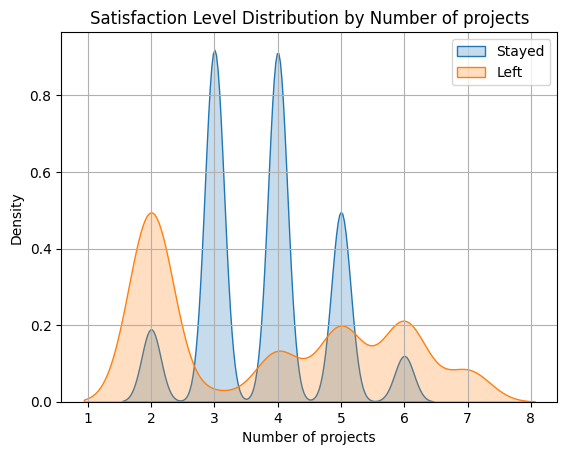

In [32]:
sns.kdeplot(data=df[df['left'] == 0]['number_project'], label='Stayed', fill=True)
sns.kdeplot(data=df[df['left'] == 1]['number_project'], label='Left', fill=True)
plt.title('Satisfaction Level Distribution by Number of projects')
plt.xlabel('Number of projects')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# logistic regression model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [67]:
categorical_features = ['Department', 'salary']
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[categorical_features])
final_df = pd.concat([df.drop(columns=categorical_features), ohe_transform], axis=1)
final_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14995,0.37,0.48,2,160,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14996,0.37,0.53,2,143,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14997,0.11,0.96,6,280,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns=['left']), final_df['left'], test_size=0.1)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
model = linear_model.LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [91]:
model.predict(X_test_scaled)

array([0, 1, 0, ..., 0, 0, 0], shape=(1500,))

In [92]:
model.score(X_test_scaled, y_test)

0.7713333333333333